In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', None)

Se carga el CSV procedente de la Parte 1 del ejercicio

In [2]:
df = pd.read_csv('../data/1000sujetos_editado.csv')

Nos quedamos solo con las personas que sí consumen sustancias psicotrópicas

## Parte 2/2

### 2.1 Visión general

### Ficha de dataset

Dataset: Encuesta de consumo de sustancias psicotrópicas\
Periodo: Enero-abril 2024

|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Notas|
|-|-|-|-|-|
| edad | Edad | Numérica | Media |   |
| sexo | Sexo | Binaria | Media |   |
| estatus | Estado civil | Categórica | Media |   |
| entorno_res | Urbano/rural | Categórica | Media |   |
| empleo | Tipo de empleo | Categórica | Media |   |
| nivel_edu | Nivel de estudios | Categórica | Media |   |
| ingresos | Ingresos anuales($) | Numérica | Media |   |
| consumo_estimado | Cantidad media (gramos) de la sustancia consumida | Numérica | Alta |   |
| frec_anual | Frecuencia de consumo | Categórica | Alta | 7 categorías |
| consume_para_tratar | Si consume psicodélicos como tratamiento | Binaria | Alta |   |
| intencion_consumo_tratar | Si tiene intención de consumir psicodélicos como tratamiento | Categórica | Media | Sí, no, tal vez  |
| abierto_terap_psicodel | Si está abierto a terapia con psicodélicos | Categórica | Media | Sí, no, tal vez  |
| sustancias_consumidas_princ | Sustancia consumida indicada en primer lugar en la encuesta | Categórica | Alta | 7 categorías |
| motivacion_princ | Motivación de consumo indicado en primer lugar en la encuesta | Categórica | Baja | 5 categorías |
| donde_consume_princ | Lugar de consumo indicado en primer lugar en la encuesta | Categórica | Baja | 5 categorías |
| con_quien_consume_princ | Compañía de consumo indicado en primer lugar en la encuesta | Categórica | Baja | 6 categorías |

### 2.2 Frecuencia de variables categóricas

In [3]:
columnas_categoricas = ['sexo', 'estatus', 'entorno_res', 'empleo', 'nivel_edu', 'frec_anual', 'consume_para_tratar', 'intencion_consumo_tratar', 'abierto_terap_psicodel']

In [4]:
for categorica in columnas_categoricas:
    print(f"Frecuencias absolutas para {categorica}")
    print(df[categorica].value_counts())
    print("\n")

Frecuencias absolutas para sexo
sexo
Hombre    439
Mujer     303
Name: count, dtype: int64


Frecuencias absolutas para estatus
estatus
Soltero/a                                 322
En pareja                                 192
Casado/a                                  141
Divorciado/a                               69
Viudo/a                                     7
Separada                                    2
Separado                                    1
Distanciado                                 1
Relación no conviviente                     1
Casade pero en relaciones poliamorosas      1
Separada sin casarse con hijo               1
Pareja no conviviente                       1
No tengo carga                              1
Poliamor                                    1
Madre monoparental                          1
Name: count, dtype: int64


Frecuencias absolutas para entorno_res
entorno_res
Urbano    567
Rural     175
Name: count, dtype: int64


Frecuencias absolutas para empleo
emple

### 2.3 Frecuencia de variables numéricas

In [5]:
columnas_numericas = ['edad', 'ingresos', 'consumo_estimado']

In [6]:
df.describe()

,edad
count,742.000000
mean,40.126685
std,12.576465
min,18.000000
25%,30.000000
50%,40.000000
75%,48.000000
max,75.000000


In [7]:
def plot_combined_graphs(df, columns, whisker_width=1.5, bins=None):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

(3, 2)


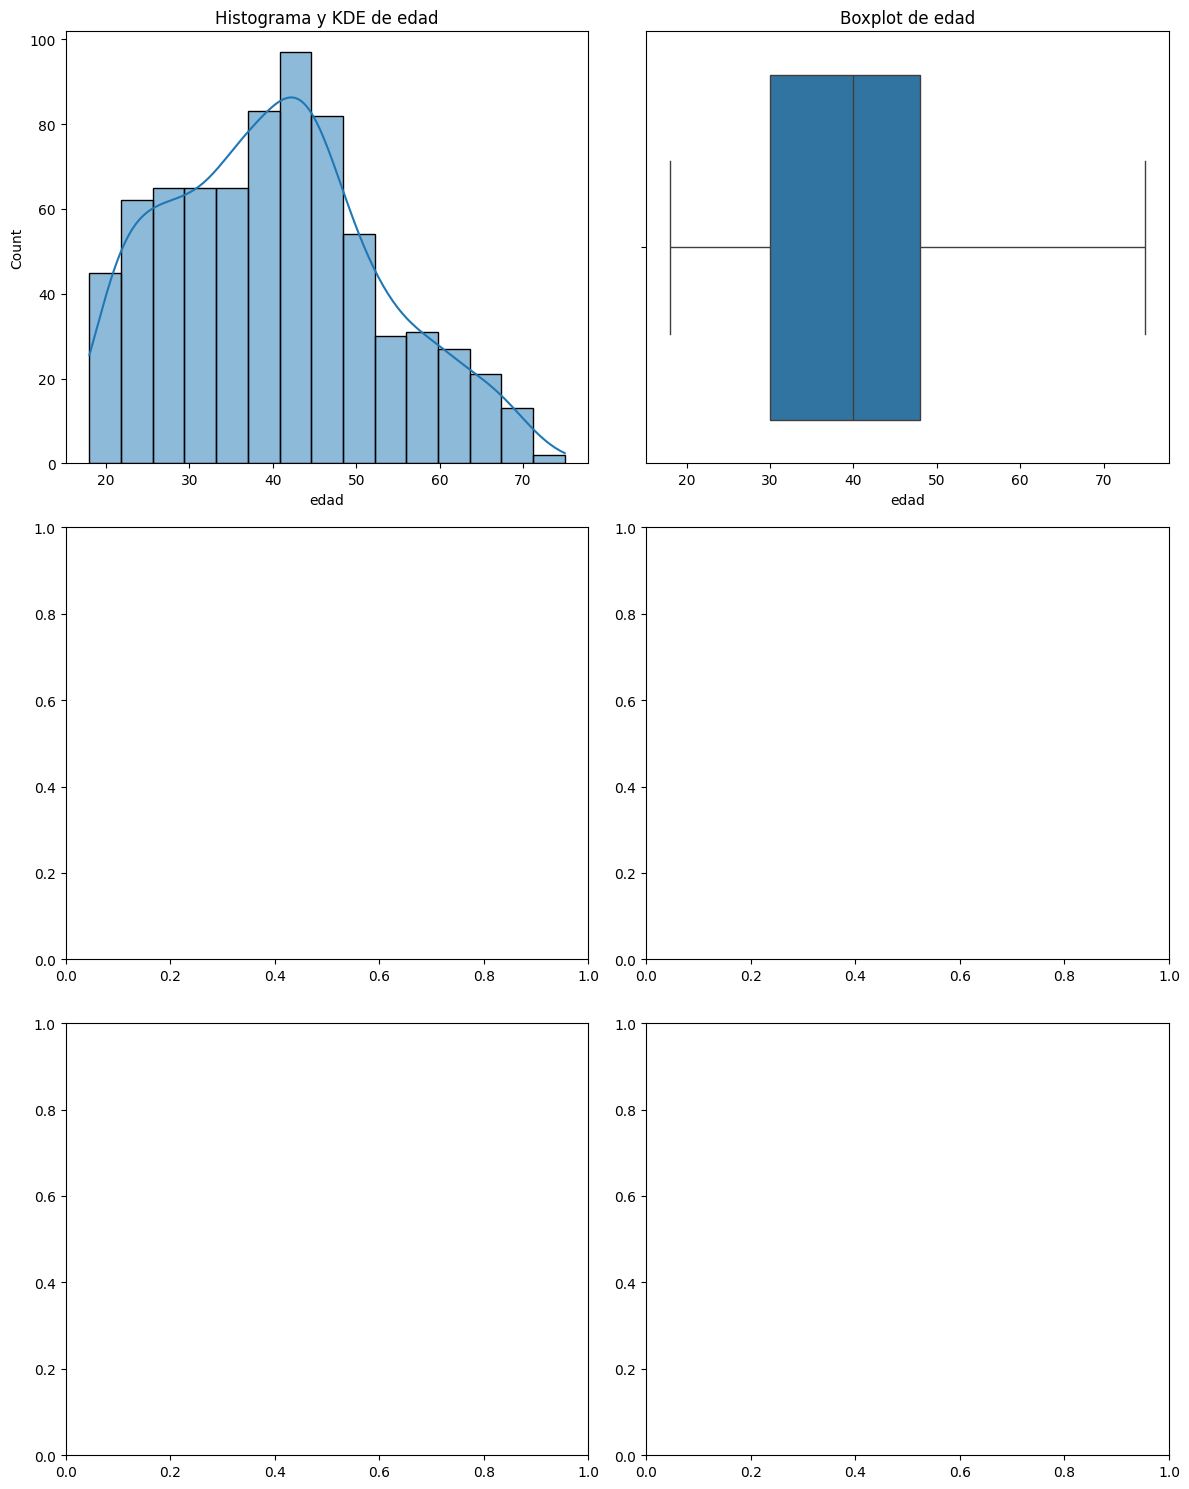

In [8]:
plot_combined_graphs(df, columnas_numericas, whisker_width=1.5, bins=None)

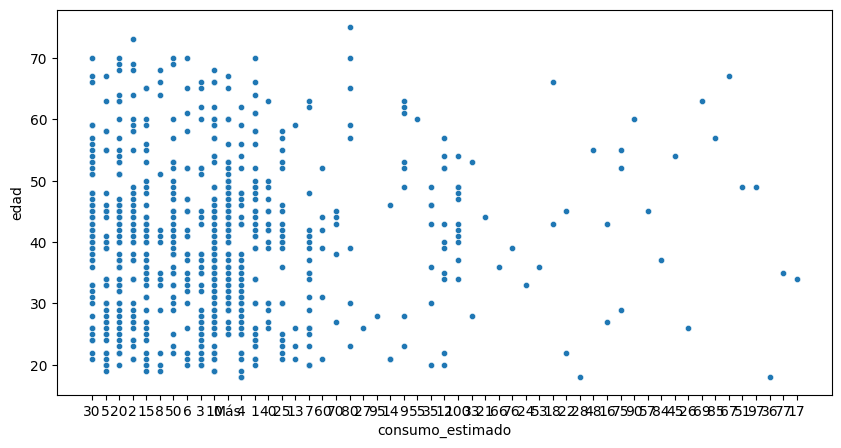

In [14]:
variable_numerica_1 = "consumo_estimado"
variable_numerica_2 = "edad"

plt.figure(figsize=(10,5))
sns.scatterplot(x= variable_numerica_1,
                y= variable_numerica_2,
                data = df,
               s=20);

In [10]:
tabla_contingencia = pd.crosstab(df['edad'], df['consumo_estimado'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 3099.4052251094745
P-Value: 8.14857675444444e-05
Grados de Libertad: 2808
Tabla de Frecuencias Esperadas:
 [[1.94070081e-01 4.31266846e-01 5.92991914e-02 ... 5.39083558e-03
  5.39083558e-03 4.31266846e-01]
 [3.39622642e-01 7.54716981e-01 1.03773585e-01 ... 9.43396226e-03
  9.43396226e-03 7.54716981e-01]
 [7.76280323e-01 1.72506739e+00 2.37196765e-01 ... 2.15633423e-02
  2.15633423e-02 1.72506739e+00]
 ...
 [2.91105121e-01 6.46900270e-01 8.89487871e-02 ... 8.08625337e-03
  8.08625337e-03 6.46900270e-01]
 [4.85175202e-02 1.07816712e-01 1.48247978e-02 ... 1.34770889e-03
  1.34770889e-03 1.07816712e-01]
 [4.85175202e-02 1.07816712e-01 1.48247978e-02 ... 1.34770889e-03
  1.34770889e-03 1.07816712e-01]]


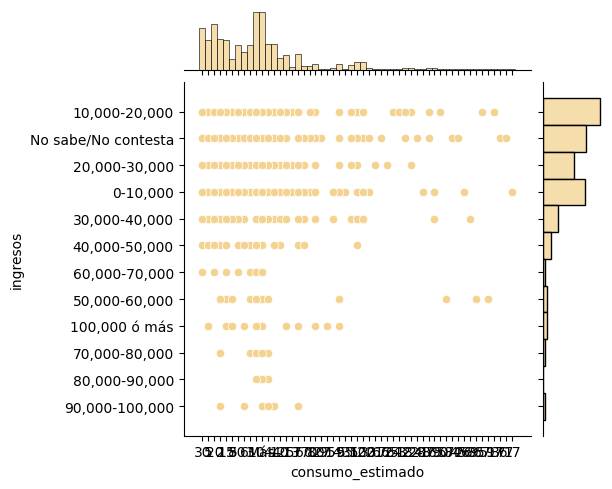

In [13]:
sns.jointplot(x=df['consumo_estimado'],
              y = df['ingresos'],
              color = '#f4D391',
              height = 5);

ValueError: s must be a scalar, or float array-like with the same size as x and y

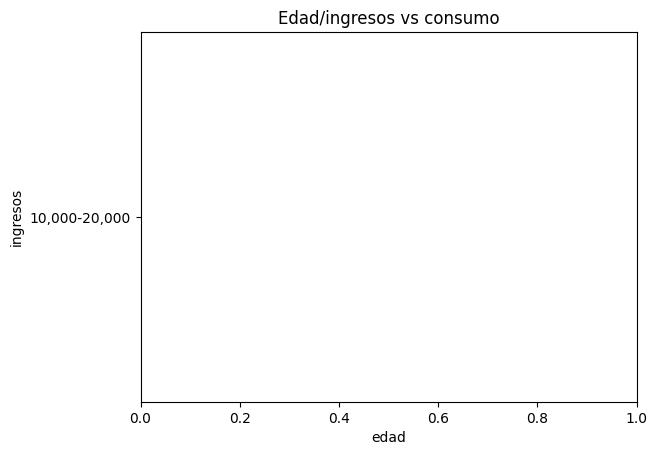

In [12]:
#Grafico de dispesión plt.scatter()
x = df['edad']
plt.xlabel("edad")
y = df['ingresos'] 
plt.ylabel("ingresos")
consumo = df['consumo_estimado']

plt.title("Edad/ingresos vs consumo")

plt.scatter(x, y, s=consumo, c=consumo,alpha=0.3,
            cmap='viridis');
plt.colorbar();

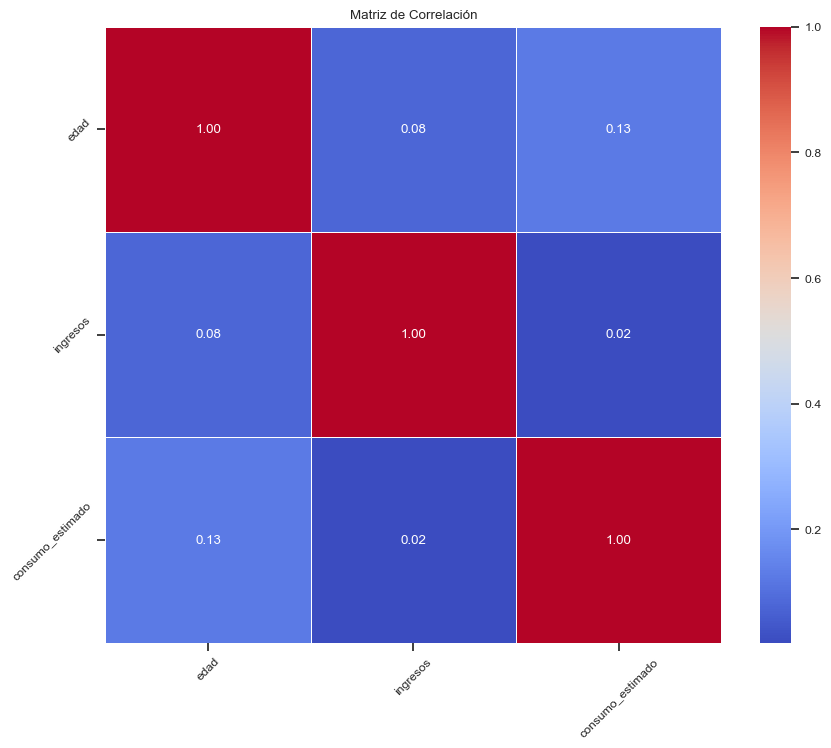

In [ ]:
corr_matrix = df.corr(numeric_only= True) # Si no lo pones y tienes variables tipo texto, fallará7
corr_matrix

# Mapa de calor
plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()

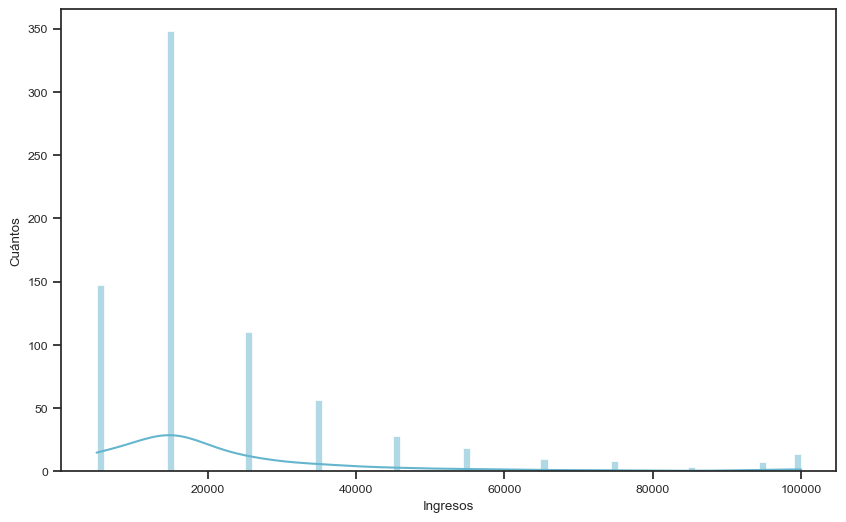

In [ ]:
fig,axs = plt.subplots(1,1,figsize= (10,6))
sns.histplot(df["ingresos"], #Ojo con /nnn mirar el valor que queremos mostrar
             kde=True, #Tipo
             color='c',
             bins=100, ax = axs) # Otra forma, sin recurrir al dataframe como argumento
axs.set_xlabel("Histograma + func densidad")
axs.set_xlabel("Ingresos")
axs.set_ylabel("Cuántos");

In [ ]:
def plot_categorical_numerical_relationship(df, categorical_col, numerical_col, show_values=False, measure='median'):
    # Calcula la medida de tendencia central (mean o median)
    if measure == 'median':
        grouped_data = df.groupby(categorical_col)[numerical_col].median()
    else:
        # Por defecto, usa la media
        grouped_data = df.groupby(categorical_col)[numerical_col].mean()

    # Ordena los valores
    grouped_data = grouped_data.sort_values(ascending=False)

    # Si hay más de 5 categorías, las divide en grupos de 5
    if grouped_data.shape[0] > 5:
        unique_categories = grouped_data.index.unique()
        num_plots = int(np.ceil(len(unique_categories) / 5))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * 5:(i + 1) * 5]
            data_subset = grouped_data.loc[categories_subset]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=data_subset.index, y=data_subset.values)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {categorical_col} y {numerical_col} - Grupo {i + 1}')
            plt.xlabel(categorical_col)
            plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de 5 categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=grouped_data.index, y=grouped_data.values)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {categorical_col} y {numerical_col}')
        plt.xlabel(categorical_col)
        plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749 entries, 0 to 1021
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   edad                         749 non-null    int64 
 1   sexo                         749 non-null    object
 2   estatus                      749 non-null    object
 3   residencia                   749 non-null    object
 4   entorno_res                  749 non-null    object
 5   empleo                       749 non-null    object
 6   nivel_edu                    749 non-null    object
 7   ingresos                     749 non-null    int64 
 8   ha_consumido                 749 non-null    object
 9   sustancias_consumidas        749 non-null    object
 10  consumo_estimado             749 non-null    int64 
 11  ultimo_consumo               749 non-null    object
 12  t_1-ultimo_cons              749 non-null    object
 13  frec_anual                   749 non-nu